In [56]:
# All the imports
import os
import math
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
# Set file locations to your data
path = os.path.dirname(os.getcwd())
dataSet = os.path.join(path,'IntroductiontoMachineLearningWithScikitLearn','data','gapminder-life-expectancy.csv')

Our aim is to calculate the values m (slope) and b (y-intercept) in the equation of a line :
y = mx + b

Where:

    y = how far up
    x = how far along
    m = Slope or Gradient (how steep the line is)
    b = the Y Intercept (where the line crosses the Y axis)

#### To find the line of best fit for N points:

* Step 1: For each (x,y) point calculate x2 and xy

* Step 2: Sum all x, y, x2 and xy, which gives us Σx, Σy, Σx2 and Σxy (Σ means "sum up")

* Step 3: Calculate Slope m: m = N Σ(xy) − Σx Σy N Σ(x2) − (Σx)2 ; (N is the number of points.)

* Step 4: Calculate Intercept b: b = Σy − m Σx N

* Step 5: Assemble the equation of a line, y = mx + b

In [58]:

def least_squares(data):
    x_sum = 0
    y_sum = 0
    x_sq_sum = 0
    xy_sum = 0

    # the list of data should have two equal length columns
    assert len(data[0]) == len(data[1])
    assert len(data) == 2

    n = len(data[0])
    # least squares regression calculation
    for i in range(0, n):
        x = int(data[0][i])
        y = data[1][i]
        x_sum = x_sum + x
        y_sum = y_sum + y
        x_sq_sum = x_sq_sum + (x**2)
        xy_sum = xy_sum + (x*y)

    m = ((n * xy_sum) - (x_sum * y_sum))
    m = m / ((n * x_sq_sum) - (x_sum ** 2))
    c = (y_sum - m * x_sum) / n

    print("Results of linear regression:")
    print("x_sum=", x_sum, "y_sum=", y_sum, "x_sq_sum=", x_sq_sum, "xy_sum=",
          xy_sum)
    print("m=", m, "c=", c)

    return m, c
# Example
x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]
least_squares([x_data,y_data])

In [60]:

def measure_error(data1, data2):
    assert len(data1) == len(data2)
    err_total = 0
    for i in range(0, len(data1)):
        err_total = err_total + (data1[i] - data2[i]) ** 2

    err = math.sqrt(err_total / len(data1))
    return err
# get the m and c values from the least_squares function
m, c = least_squares([x_data,y_data])

# create an empty list for the model y data
linear_data = []

for x in x_data:
    y = m * x + c
    # add the result to the linear_data list
    linear_data.append(y)

# calculate the error
print(measure_error(y_data,linear_data))


Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763
0.7986268703523449


Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


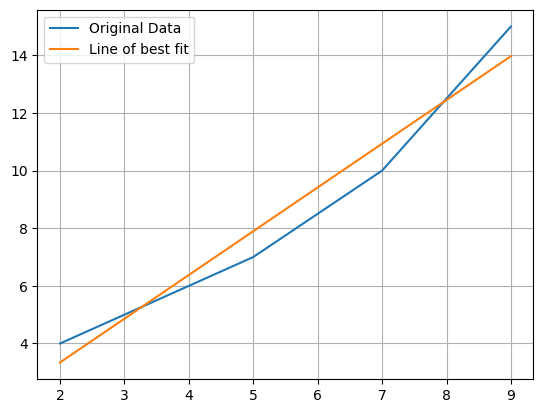

In [61]:
def make_linear(x_data, m, c):
    linear_data = []
    for x in x_data:
        y = m * x + c
        #add the result to the linear_data list
        linear_data.append(y)
    return(linear_data)

def make_graph(x_data, y_data, linear_data):

    plt.plot(x_data, y_data, label="Original Data")
    plt.plot(x_data, linear_data, label="Line of best fit")

    plt.grid()
    plt.legend()

    plt.show()

x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]

m, c = least_squares([x_data, y_data])
linear_data = make_linear(x_data, m, c)
make_graph(x_data, y_data, make_linear(x_data, m, c))


Results of linear regression:
x_sum= 120780 y_sum= 4484.220000000001 x_sq_sum= 239163310 xy_sum= 8882926.729999999
m= 0.22057800105749265 c= -363.2326388151469
error is  0.3558776748713997


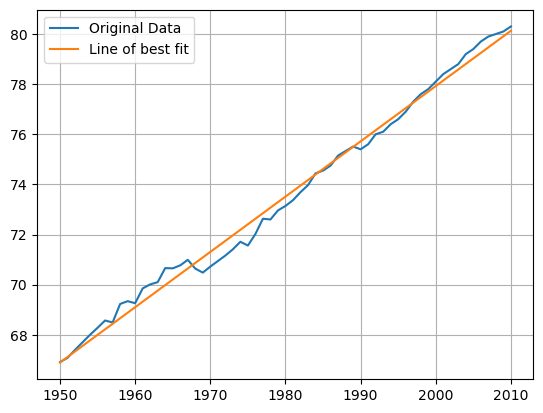

In [62]:
# put this line at the top of the file


def process_life_expectancy_data(filename, country, min_date, max_date):

    df = pd.read_csv(filename, index_col="Life expectancy")

    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df.loc[country, str(min_date):str(max_date)]

    # create a list with the numerical range of min_date to max_date
    # we could use the index of life_expectancy but it will be a string
    # we need numerical data
    x_data = list(range(min_date, max_date + 1))

    # calculate line of best fit
    m, c = least_squares([x_data, life_expectancy])
    linear_data = make_linear(x_data, m, c)

    error = measure_error(life_expectancy, linear_data)
    print("error is ", error)

    make_graph(x_data, life_expectancy, linear_data)

process_life_expectancy_data(dataSet,"Germany", 1950, 2010)

In [66]:
dataFrame = pd.read_csv(dataSet, index_col="Life expectancy")
print("year\tlife expectancy\t\treal\tdifference")
for year in range(2001,2017):
    life_expectancy = 0.22057800105749265 * year -363.2326388151469
    real = dataFrame.loc['Germany', str(year)]
    print(year,"\t", life_expectancy,"\t", real,"\t", (life_expectancy-real))

year	life expectancy		real	difference
2001 	 78.14394130089585 	 78.4 	 -0.2560586991041589
2002 	 78.36451930195335 	 78.6 	 -0.2354806980466435
2003 	 78.58509730301085 	 78.8 	 -0.21490269698914233
2004 	 78.80567530406836 	 79.2 	 -0.394324695931644
2005 	 79.02625330512586 	 79.4 	 -0.3737466948741428
2006 	 79.24683130618331 	 79.7 	 -0.4531686938166928
2007 	 79.46740930724081 	 79.9 	 -0.4325906927591916
2008 	 79.68798730829832 	 80.0 	 -0.3120126917016819
2009 	 79.90856530935582 	 80.1 	 -0.19143469064417218
2010 	 80.12914331041333 	 80.3 	 -0.170856689586671
2011 	 80.34972131147077 	 80.5 	 -0.15027868852922666
2012 	 80.57029931252828 	 80.6 	 -0.029700687471716947
2013 	 80.79087731358578 	 80.7 	 0.09087731358577855
2014 	 81.01145531464329 	 80.7 	 0.3114553146432826
2015 	 81.23203331570079 	 80.8 	 0.4320333157007923
2016 	 81.45261131675824 	 80.9 	 0.5526113167582309
